In [8]:
df<-read.csv('d:/data/iris/iris2.csv')
head(df)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,target,Result
5.1,3.5,1.4,0.2,setosa,0
4.9,3.0,1.4,0.2,setosa,0
4.7,3.2,1.3,0.2,setosa,0
4.6,3.1,1.5,0.2,setosa,0
5.0,3.6,1.4,0.2,setosa,0
5.4,3.9,1.7,0.4,setosa,0


In [9]:
library(dplyr)
df<-df %>% select(-target)
head(df)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0


In [15]:
library(caret)
set.seed(123)
#학습용 80% 검증용 20%로 구분
idx_train<-createDataPartition(y=df$Result, p=0.8,list=F)
head(df[idx_train,])
head(df[-idx_train,])
train<-df[idx_train,] #학습용 데이터셋
X_train<-train[,-5]
y_train<-train[,5]
test<-df[-idx_train,] #검증용 데이터셋
X_test<-test[,-5]
y_test<-test[,5]

,sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0


,sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
10,4.9,3.1,1.5,0.1,0
11,5.4,3.7,1.5,0.2,0
24,5.1,3.3,1.7,0.5,0
28,5.2,3.5,1.5,0.2,0


In [16]:
head(train)

,sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0


In [11]:
library(party)
model<-ctree(Result ~ . , data=train) #의사결정나무 모형
model

Warning message:
"package 'party' was built under R version 3.6.2"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.2"


	 Conditional inference tree with 4 terminal nodes

Response:  Result 
Inputs:  sepal.length..cm., sepal.width..cm., petal.length..cm., petal.width..cm. 
Number of observations:  120 

1) petal.length..cm. <= 1.9; criterion = 1, statistic = 48.922
  2)*  weights = 39 
1) petal.length..cm. > 1.9
  3) petal.width..cm. <= 1.7; criterion = 1, statistic = 53.222
    4) petal.length..cm. <= 4.8; criterion = 0.998, statistic = 12.379
      5)*  weights = 36 
    4) petal.length..cm. > 4.8
      6)*  weights = 8 
  3) petal.width..cm. > 1.7
    7)*  weights = 37 

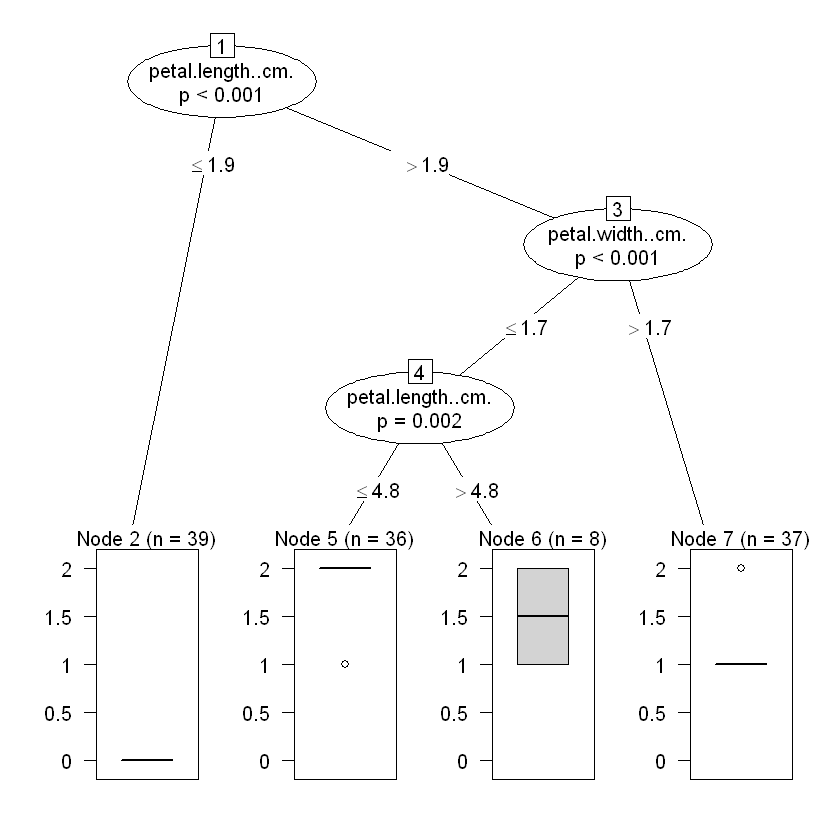

In [17]:
plot(model) #트리 그래프

In [18]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train) #모형에서 예측한 값 (실수형)
table(y_train,round(pred)) #오분류표
mean(round(pred)==y_train) #예측정확도(모형의 성능)

       
y_train  0  1  2
      0 39  0  0
      1  0 36  5
      2  0  1 39

[1] 0.95

In [20]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_test)
table(y_test,round(pred))
mean(round(pred)==y_test)

      
y_test  0  1  2
     0 11  0  0
     1  0  9  0
     2  0  0 10

[1] 1

In [21]:
library(randomForest)
set.seed(1)
#랜덤포레스트 모형 mtry 변수갯수, tree 트리갯수,
#importance=T 특성중요도 사용
model<-randomForest(Result ~ . , data=train,
                    mtry=floor(sqrt(ncol(train))),tree=100,importance=T)
model

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = Result ~ ., data = train, mtry = floor(sqrt(ncol(train))),      tree = 100, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 0.0425697
                    % Var explained: 93.53

In [22]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train) #모형에서 예측한 값 (실수형)
table(y_train,round(pred)) #오분류표
mean(round(pred)==y_train) #예측정확도(모형의 성능)

       
y_train  0  1  2
      0 39  0  0
      1  0 41  0
      2  0  2 38

[1] 0.9833333

In [23]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_test)
table(y_test,round(pred))
mean(round(pred)==y_test)

      
y_test  0  1  2
     0 11  0  0
     1  0  9  0
     2  0  0 10

[1] 1

In [24]:
importance(model) #정확도와 중요도

,%IncMSE,IncNodePurity
sepal.length..cm.,7.366655,6.701575
sepal.width..cm.,5.891324,3.028026
petal.length..cm.,24.704671,31.992303
petal.width..cm.,26.416615,35.761889


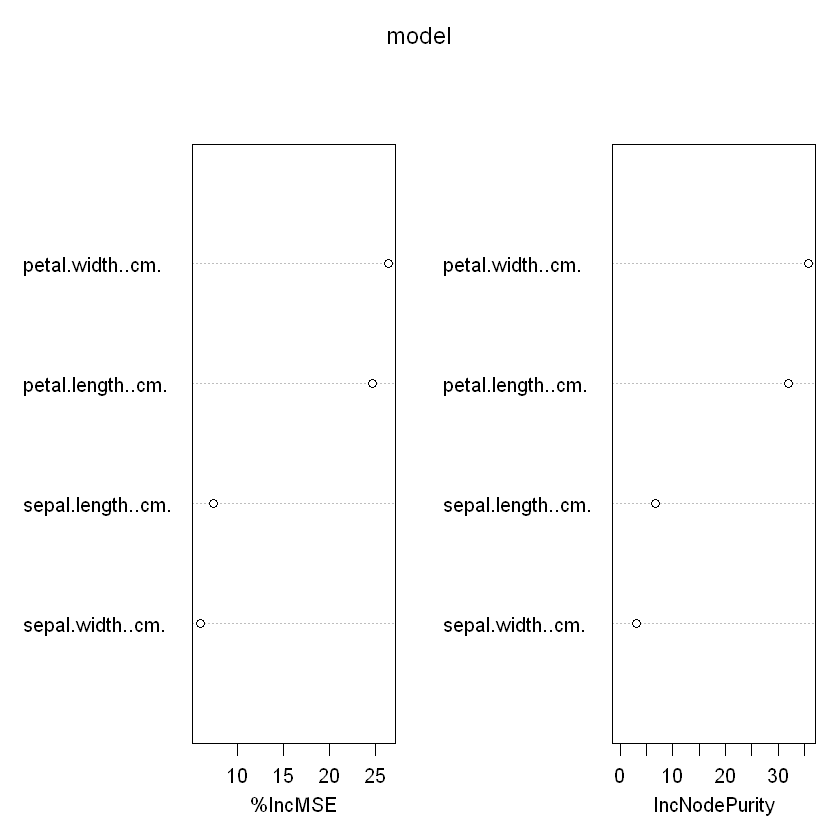

In [25]:
varImpPlot(model)